In [5]:
import sys
sys.path.insert(0, '/scratch/autocnet')

import networkx as nx # draw adjacency graph
import os # get file path

from scipy.misc import bytescale # store image array

import autocnet
import autocnet.fileio.io_json as io_json # read json file

from autocnet.examples import get_path # get file path
from autocnet.fileio.io_gdal import GeoDataset # set handle, get image as array
from autocnet.graph.network import CandidateGraph #construct adjacency graph
from autocnet.matcher import feature_extractor as fe # extract features from image
from autocnet.matcher.matcher import FlannMatcher # match features between images

In [6]:
# display graphs in separate window to be able to change size
# %pylab qt4
# displays graphs in noteboook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


View the input json adjacency file
--------------------------------------

In [7]:
adjacency_file = get_path('two_image_adjacency.json')
# This file is a dictionary of images with a corresponding list of known adjacent images
print(type(io_json.read_json(adjacency_file)))
print( io_json.read_json(adjacency_file))

<class 'dict'>
{'autocnet/examples/Apollo15/AS15-M-0297_SML.png': ['autocnet/examples/Apollo15/AS15-M-0298_SML.png'], 'autocnet/examples/Apollo15/AS15-M-0298_SML.png': ['autocnet/examples/Apollo15/AS15-M-0297_SML.png']}


View the Adjacency Graph
---------------------------

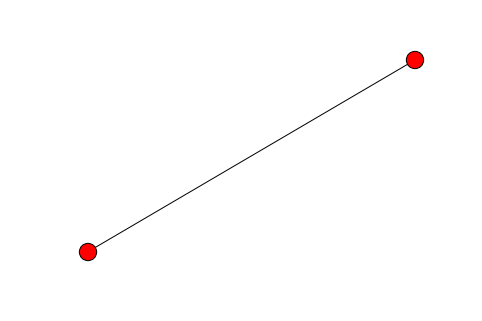

In [8]:
# Create a dictionary of images and their serial numbers.
serial_numbers = {'AS15-M-0295_SML.png': 'APOLLO15/METRIC/1971-07-31T01:24:11.754',
                  'AS15-M-0296_SML.png': 'APOLLO15/METRIC/1971-07-31T01:24:36.970',
                  'AS15-M-0297_SML.png': 'APOLLO15/METRIC/1971-07-31T01:25:02.243',
                  'AS15-M-0298_SML.png': 'APOLLO15/METRIC/1971-07-31T01:25:27.457',
                  'AS15-M-0299_SML.png': 'APOLLO15/METRIC/1971-07-31T01:25:52.669',
                  'AS15-M-0300_SML.png': 'APOLLO15/METRIC/1971-07-31T01:26:17.923'}

# Construct an adjacency graph from a json file and draw it.
adjacencyGraph = CandidateGraph.from_adjacency(adjacency_file)
nx.draw(adjacencyGraph)

View the Adjacency Graph Attributes
---------------------------------------
* 'handle' = The GeoDataset from the image file
* 'image'  = The NumPy array of the image data
* 'keypoints' = The list of OpenCV Keypoints (features)
* 'descriptors' = The list of descriptor arrays that correspond with the Keypoints

In [9]:
# Extracting image data and attribute nodes

# Get the path without file name
basepath = os.path.dirname(adjacency_file)

# Loop through the nodes (images) on the graph and fill in their attributes dictionaries.
adjacencyGraph.extract_features(5)
for node, attributes in adjacencyGraph.nodes_iter(data=True):
    
    print('NODE HANDLE = ', attributes['handle'])
    
    print('NODE IMAGE ARRAY = ')
    print(attributes['image'])
    
    print('NODE KEYPOINTS = ')
    for kp in attributes['keypoints']:
        print(kp.pt)    

    print('NODE KEYPOINT DESCRIPTORS = ')
    print(attributes['descriptors'])
    
    print('-------------------------------------End Node Attribute-------------------------------------')

OSError: [Errno File not found :] /scratch/autocnet/autocnet/notebooks/autocnet/examples/Apollo15/AS15-M-0297_SML.png

View the KD-Tree
----------------

In [ ]:
# Apply a FLANN matcher
matcher = FlannMatcher()

# Loop through the nodes on the graph and feature descriptors to the matcher
for node, attributes in adjacencyGraph.nodes_iter(data=True):
    matcher.add(attributes['descriptors'], key=node)
    
# build KD-Tree using the feature descriptors
matcher.train()

TODO: KD-Tree visualization???
see http://cgi.di.uoa.gr/~std04139/Kd_tree_Project/PythonImplementation/kdtree_visualization_2.py

View the matches attribute of the edge
-------------------------------------------

In [ ]:
# Loop through the nodes on the graph to find all features that match at 1 neighbor
# These matches are returned as PANDAS dataframes and added to the adjacency graph
for node, attributes in adjacencyGraph.nodes_iter(data=True):
    descriptors = attributes['descriptors']
matches = matcher.query(descriptors, node, k=2)
adjacencyGraph.add_matches(matches)

In [ ]:
for image1, image2, attributes in adjacencyGraph.edges_iter(data=True):
    print(attributes['matches'])

# there is one edge, display matches between 2 images:

In [ ]:
# TEMP
# TO DO ADD __str__() to graph class
for image1, image2, attributes in adjacencyGraph.edges_iter(data=True):
    image_name_src = attributes['matches']['source_image'].values[0]
    print(adjacencyGraph.node[image_name_src]['image_name'])
# there is one edge, display matches between 2 images: